In [ ]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_Rap.csv')
#print(data)

# Train Test Split
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train.shape)

# Neural Network

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 11s 15ms/step - loss: 0.5060 - accuracy: 0.7714 - precision: 0.4375 - recall: 0.0192
Epoch 2/50
250/250 [==============================] - 2s 10ms/step - loss: 0.4840 - accuracy: 0.7760 - precision: 0.5692 - recall: 0.0610
Epoch 3/50
250/250 [==============================] - 2s 10ms/step - loss: 0.4720 - accuracy: 0.7810 - precision: 0.5977 - recall: 0.1127
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4557 - accuracy: 0.7911 - precision: 0.6462 - recall: 0.1798
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4392 - accuracy: 0.7935 - precision: 0.6171 - recall: 0.2419
Epoch 6/50
250/250 [==============================] - 3s 13ms/step - loss: 0.4156 - accuracy: 0.8090 - precision: 0.6759 - recall: 0.3073
Epoch 7/50
250/250 [==============================] - 3s 12ms/step - loss: 0.3901 - accuracy: 0.8191 - precision: 0.6813 - recall: 0.3843
Epoch 8/50
250/250 [===============

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (32, 128)                 1664      
                                                                 
 dense_5 (Dense)             (32, 256)                 33024     
                                                                 
 dense_6 (Dense)             (32, 256)                 65792     
                                                                 
 dense_7 (Dense)             (32, 1)                   257       
                                                                 
Total params: 100,737
Trainable params: 100,737
Non-trainable params: 0
_________________________________________________________________


# Perforomance + Plot Graph 

In [ ]:
predictions = model.predict(X_test_scaled)

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

print(confusion_matrix(y_test, prediction_classes))

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

63/63 [==============================] - 0s 1ms/step
[[1473  111]
 [  76  340]]
Accuracy: 0.9065
Precision: 0.7539
Recall: 0.8173


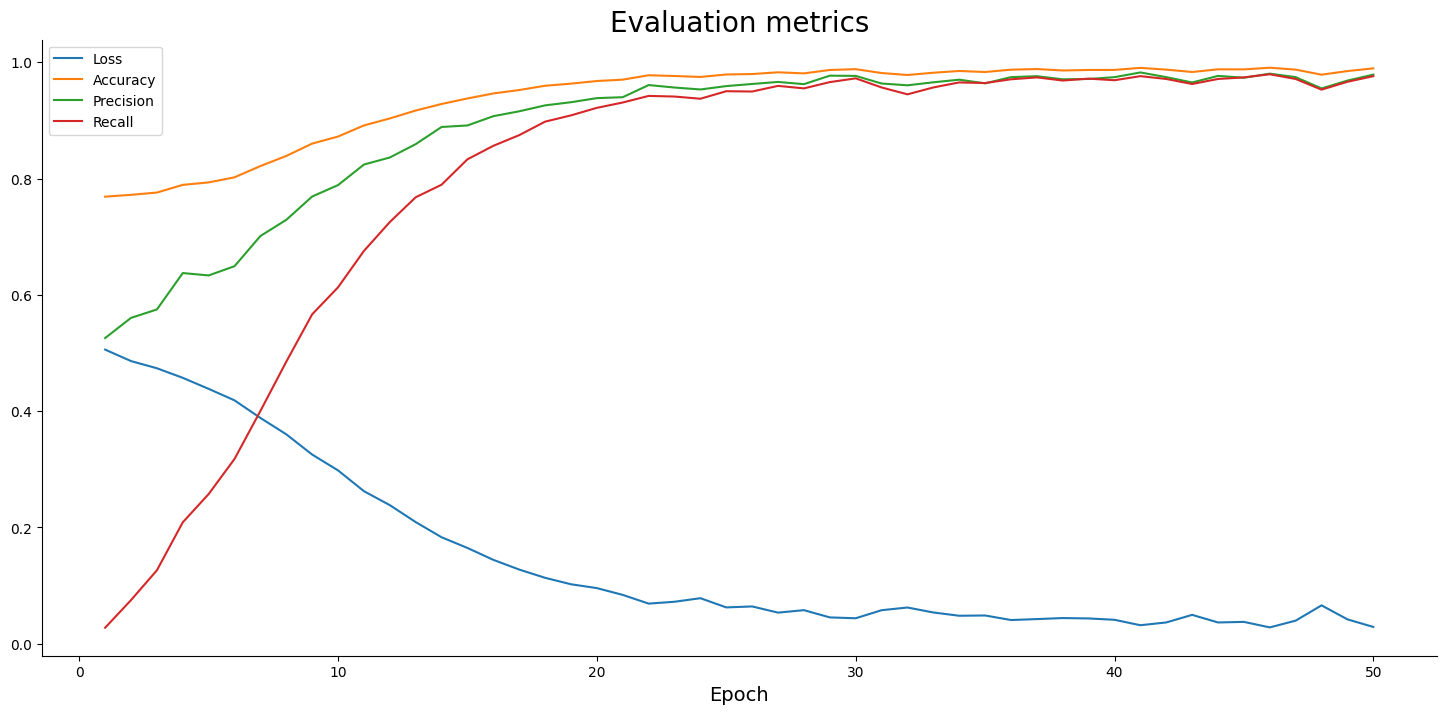

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();